In [ ]:
import cv2
import numpy as np

In [ ]:
class clarify():

    def __init__(self, path=None, img=None):
        # open file into image array or use image itself
        if img is None:
            if path is not None:
                self.img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
            else:
                raise Exception('You have to provide a path or image itself.')
        else:
            self.img = img

    # clear image.
    # mybb captcha.php seems make its color palette of string between 0 and 200.
    # anything above 200 is noise.
    # also completely black pixels in edges must filtered
    def clarify_img(self):
        self.img[np.logical_or(np.max(self.img, axis=2)>200, np.sum(self.img, axis=2)==0)] = [255, 255, 255]

    # RGB to GRAY
    def gray(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY)

    def resize(self, size):
        self.img = cv2.resize(self.img, size)
    # clear and gray
    def clarify_and_gray(self):
        self.clarify_img()
        self.resize((48, 48))
        self.gray()


In [ ]:
from google.colab.patches import cv2_imshow

# Bandingakan dataset luar dengan dataset acuan

In [ ]:
img = cv2.imread("1x0o5.jpg")
img_foreign = cv2.resize(img, (200, 60))
# img

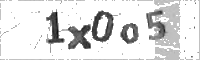

In [ ]:
# dataset luar
clr = clarify(img=img_foreign)
clr.clarify_img()
clr.gray()
img = clr.img

cv2.imwrite("test_clarified.png", img)
img = cv2.imread("test_clarified.png")
cv2_imshow(img)

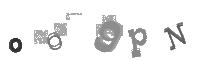

In [ ]:
# dataset acuan
clr = clarify(path="oo9pN.png")
clr.clarify_img()
clr.gray()
img = clr.img

cv2.imwrite("test_clarified.png", img)
img = cv2.imread("test_clarified.png")
cv2_imshow(img)

# visualisasi

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
gray_img[1,:]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

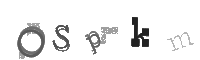

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2_imshow(closing)

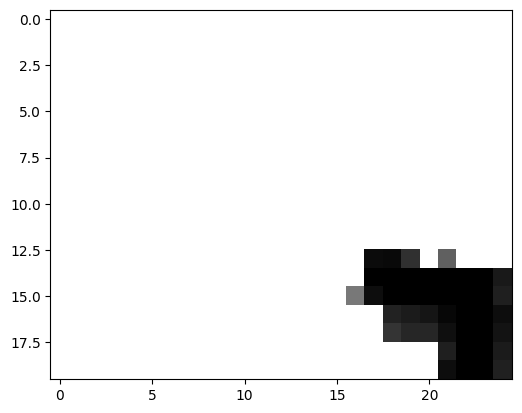

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(gray_img[:20, :25], cmap = "gray")
plt.show()

In [ ]:
gray_img[:20, :25]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
      

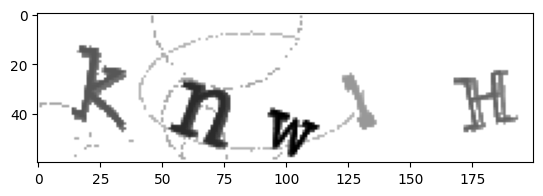

In [ ]:
plt.imshow(gray_img, cmap = "gray")
plt.show()

In [ ]:
rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

In [ ]:
rgb_img[1,:,:]

In [ ]:
img.shape

(42, 150, 3)

In [ ]:
img.shape

(60, 200, 3)

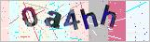

In [ ]:
cv2_imshow(img)

In [ ]:
tes = img[np.logical_or(np.max(img, axis=2)>200, np.sum(img, axis=2)==0)] = [255, 255, 255]

In [ ]:
print(tes)

[255, 255, 255]


In [ ]:
print(img.shape)

(60, 200, 3)


In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
print(img_gray.shape)

(60, 200)


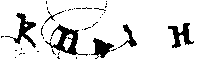

In [ ]:
ret,thresh1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
# erosion = cv2.erode(opening,kernel,iterations = 1)
cv2_imshow(opening)


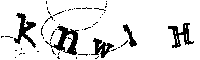

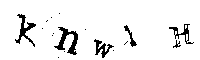

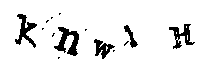

In [ ]:
ret,thresh1 = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
dilate = cv2.dilate(thresh1,kernel)
cv2_imshow(dilate)
erosion = cv2.erode(dilate,kernel,iterations = 1)
cv2_imshow(erosion)

In [ ]:
"tes"+"__"+".png"

'tes__.png'

In [ ]:
"tes.png".split(".")

['tes', 'png']

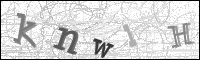

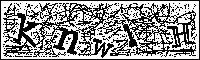

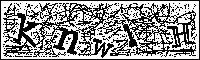

In [ ]:

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
cv2_imshow(th3)
th3.shape
scale = 500
width = int(200)
height = int(60)

dim = (width, height)
resized = cv2.resize(th3, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

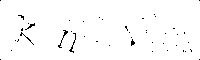

In [ ]:

dilate = cv2.dilate(resized,kernel)
cv2_imshow(dilate)

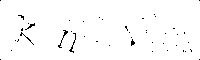

In [ ]:
opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN,kernel)
cv2_imshow(opening)

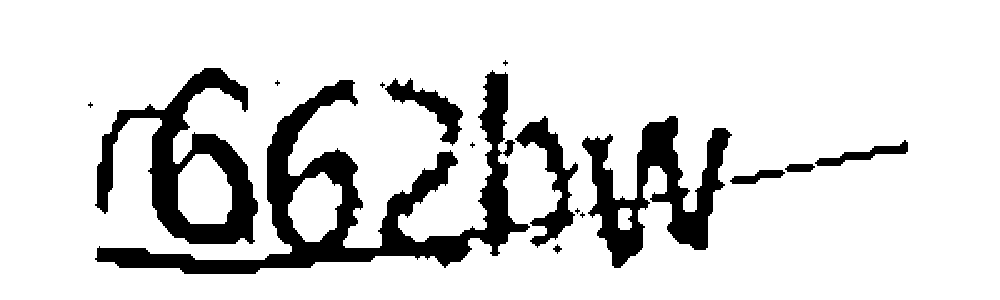

In [ ]:

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

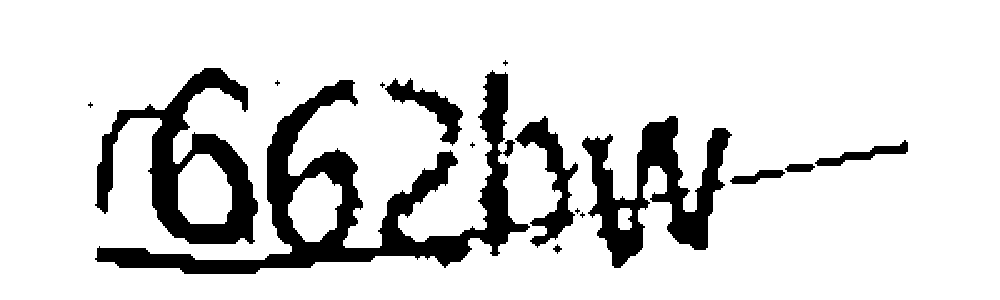

In [ ]:

ret,thresh1 = cv2.threshold(closing,80,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

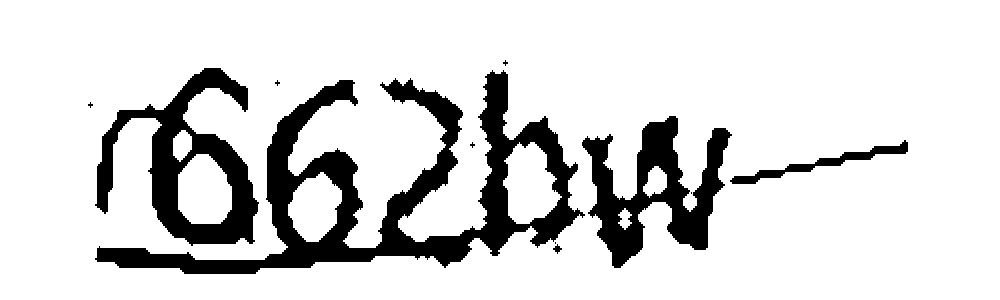

In [ ]:

opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN,kernel, iterations= 3)
cv2_imshow(opening)

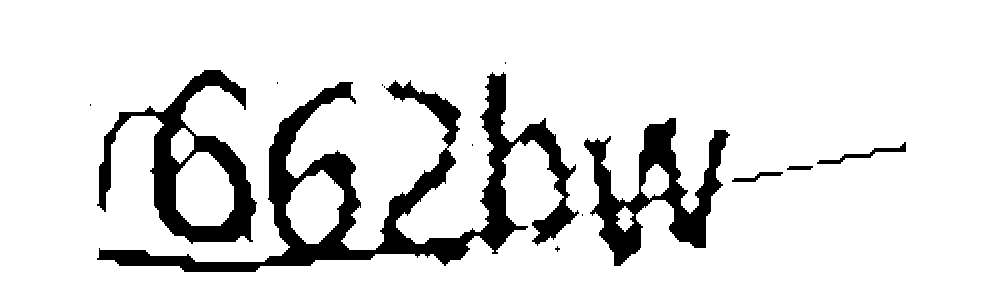

In [ ]:

dilate = cv2.dilate(opening,kernel)
cv2_imshow(dilate)

In [ ]:

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,4))

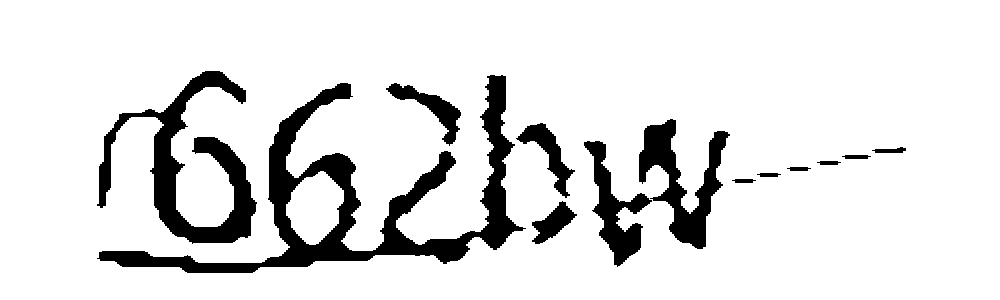

In [ ]:

closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

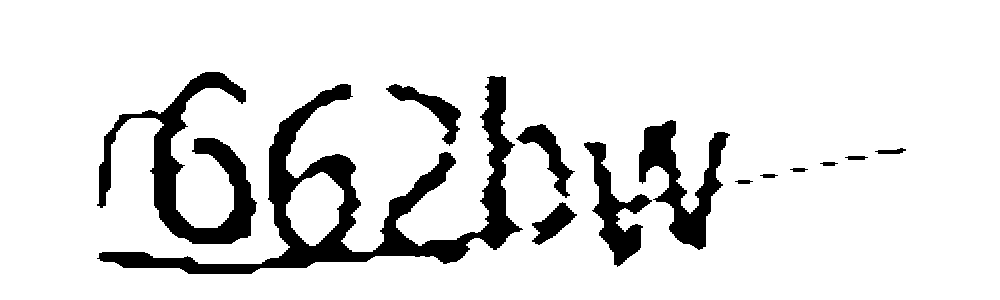

In [ ]:

tes = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
cv2_imshow(tes)

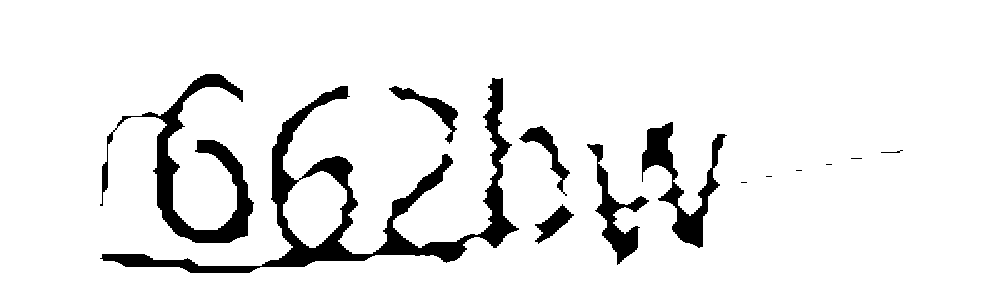

In [ ]:

dilation = cv2.dilate(tes,kernel,iterations = 1)
cv2_imshow(dilation)

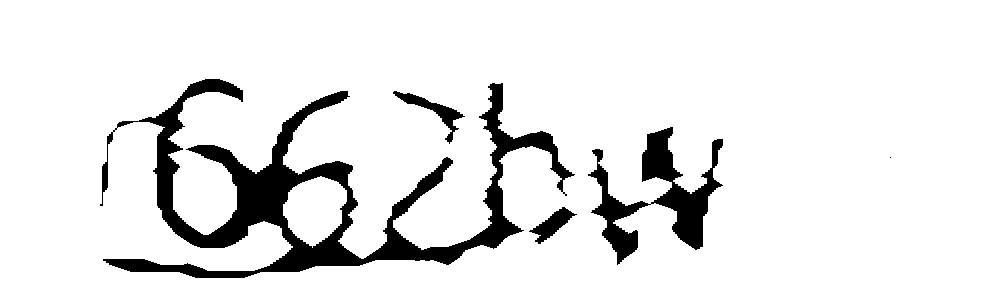

In [ ]:

opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations= 5)
cv2_imshow(opening)

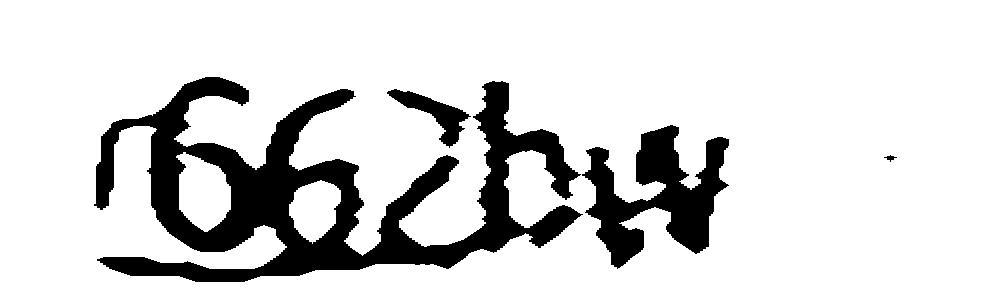

In [ ]:

erosion = cv2.erode(opening,kernel, iterations=2)
cv2_imshow(erosion)

In [ ]:

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,15))

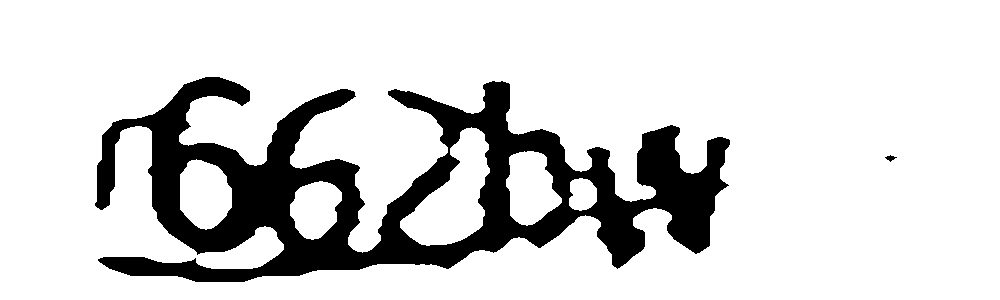

In [ ]:

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

In [ ]:
np.unique(opening)

array([  0, 255], dtype=uint8)

In [ ]:
erosion

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

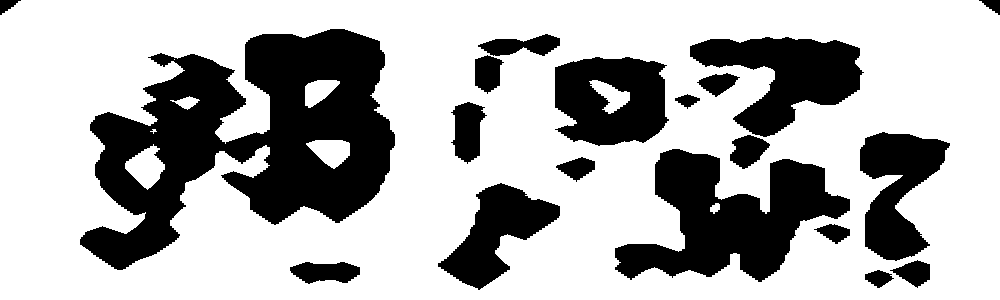

In [ ]:
ret,thresh1 = cv2.threshold(erosion,80,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

In [ ]:
ret

80.0

In [ ]:
def clearfy(img):
  img = cv2.imread(img)
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
  cv2.THRESH_BINARY,11,2)
  width = int(200)
  height = int(60)
  dim = (width, height)

  resized = cv2.resize(th3, dim, interpolation = cv2.INTER_AREA)

  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))

  dilate = cv2.dilate(resized,kernel)
  # opening = cv2.morphologyEx(dilate, cv2.MORPH_OPEN,kernel)
  closing = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel)
  ret,thresh1 = cv2.threshold(closing,50,255,cv2.THRESH_BINARY)
  opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN,kernel)


  return  opening
  # cv2_imshow(opening)


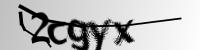

In [ ]:
img = cv2.imread("2cgyx.png")
cv2_imshow(img)

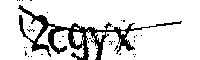

In [ ]:
img = clearfy("2cgyx.png")
cv2_imshow(img)

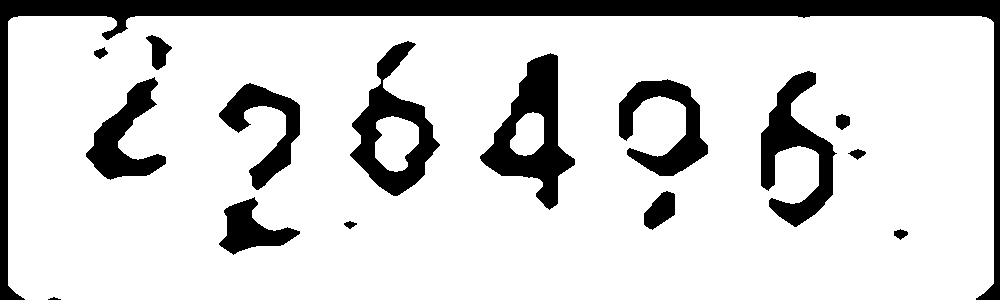

In [ ]:
clearfy("contoh_captcha.jpg")

In [ ]:
clrf = clarify("captcha_2a2x.png")
clrf.clarify_and_gray()
image = clrf.img

cv2_imshow(image)

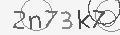

In [ ]:
clrf = clarify("20170412233525_2n73k7.jpeg")
clrf.clarify_and_gray()
image = clrf.img

cv2_imshow(image)

In [ ]:
clrf = clarify("2b827.png")
clrf.clarify_and_gray()
image = clrf.img

cv2_imshow(image)

ValueError: ignored

In [ ]:
cv2.imread("captcha_2a2x.png").shape

(24, 72, 3)

In [ ]:
cv2.imread("Rio_1adxz.png").shape

(50, 250, 3)

In [ ]:
cv2.imread("2b827.png").shape

(50, 200, 3)

In [ ]:
cv2.imread("20170412233525_2n73k7.jpeg").shape

(35, 120, 3)

In [ ]:
cv2_imshow(image)

In [ ]:
"captcha_2a2x.png".split("_")[1]

'2a2x.png'